In [8]:
import pandas as pd

# Path to the Excel file (replace with your actual file path)
file_path = "Active Users.xlsx"

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(file_path, engine='openpyxl')

# Remove any column with "Unnamed" in its name
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Display the cleaned DataFrame
df.head()

# Optionally, you can save the cleaned DataFrame to a new Excel file
# df.to_excel("Cleaned_Active_Users.xlsx", index=False)


,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,...,w47,w48,w49,w50,w51,w52,w53,w54,w55,w56
0,fd7c28f9fd8045f2,fd7c28f9fd8045f2,fd7c28f9fd8045f2,fd7c28f9fd8045f2,fd7c28f9fd8045f2,231d91be38352d7a,306243851b716bf6,149f7dd1efe25ebc,191a909000d7123d,191a909000d7123d,...,ffedb2a5b3b4838,ffedb2a5b3b4838,fff444dcd8f9808f,ffedb2a5b3b4838,ffedb2a5b3b4838,ffedb2a5b3b4838,ffedb2a5b3b4838,fffe76c3a948cdfb,fffe76c3a948cdfb,fffe76c3a948cdfb
1,673000000000000,5ff4cd01b5eae601,1402081a023d5c18,45b649baf6882a4a,c92f828ffdd1c1c0,7c8de50e4a84f1ee,eff8ecf5cb54ffe7,b50740442eb78a75,e85d8cc04adae6cc,cf8dfdbbb526c506,...,ba41adb7a1568fc5,bd978de5c78a1e7f,bcd8431a4069ef3a,bc5171f7f40e4ba3,bc1a7fed50193f41,bb1e4d0008cbabf,bb2e76bb3174a0be,bd0228ee50f09d79,bb4370c7306bb336,b81f04d72ef2e150
2,15600000000000000000000,7cd4b3218dbffa0b,99acf0df83dc2831,49740201a5f203eb,8cf94ff315895955,58453f722733b72e,7ec2e98a1613db6c,20e2a9da9c0146ee,fbeb97ecc066639,42aabbe8fa2b258a,...,a511a97e74f9677,a88369720be3c554,a9546553268bcf50,a80bcb52740a9ccd,a7292f3d0d80985b,a5d5d8560d64b95a,a7914920e3ef2b55,a95f016d03945e5c,a6e99e4acd1701d6,a3c2066710a6d65
3,10156b703e26c334,25167a08527132ac,4820782b3cb8f570,ae16cc7b72fcee52,ecaa9c1913ef2f65,e02ecf94fd8ee5c8,1aba368c76311ef3,49b64be1edab128c,6dff050c07b69b4e,b6be357ac8671a1f,...,9d8b69e45996efdb,a1c927674d1c3e37,a2565f9bd8a7a243,a05f290a51f117b,9eef01de4af7d619,9d6d4be4eab27e4b,a01148c9b12f3c15,a29b81926b57d967,9f5835c16ef759bb,9af6497cd753b9b9
4,103f96126c333035,7fbf03c17ea12589,d8aaa5b13424da35,bd26c51dd185a3cb,6028ea4b2b053007,b5c3d0e920ed6175,fa45dfe1357d3db9,b9928cbdfb35c1,d6a7f937733dea7,b7a452cfbee2d008,...,d6ced5ac1e36fa7f,d7d7f04cd08fb30a,d8b45fea77674125,d8b5f93003dc0e5a,d7f6ec45f8815d98,d6ec98374c4a453,d7415d7979ce86d9,d84e5dc003ef9155,d851694a086bfc17,d63515fbe6484033


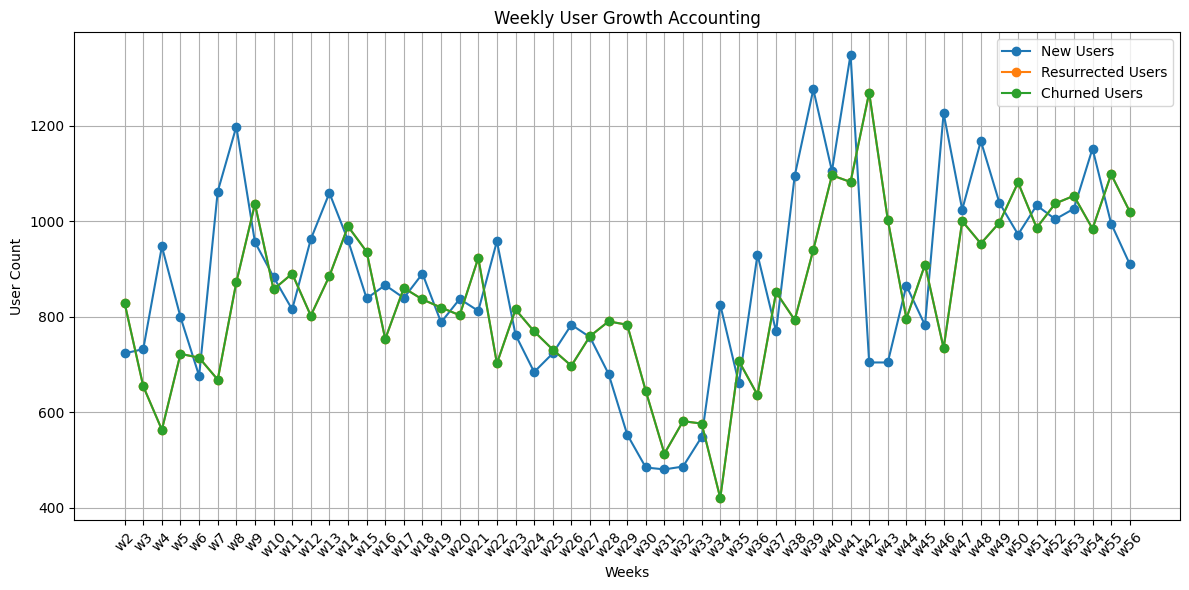

In [9]:
new_users = []
resurrected_users = []
churned_users = []

# Loop through all weeks starting from week 2 (w2) to week 56 (w56)
for i in range(2, 57):  # From week 2 (w2) to week 56 (w56)
    week_current = set(df[f'w{i}'])
    week_previous = set(df[f'w{i-1}'])
    
    new_users.append(len(week_current - week_previous))  # New users in current week
    resurrected_users.append(len(week_previous - week_current))  # Resurrected users
    churned_users.append(len(week_previous - week_current))  # Churned users

# Plotting Growth Chart
weeks = [f'w{i}' for i in range(2, 57)]  # Weeks from w2 to w56
plt.figure(figsize=(12,6))
plt.plot(weeks, new_users, label='New Users', marker='o')
plt.plot(weeks, resurrected_users, label='Resurrected Users', marker='o')
plt.plot(weeks, churned_users, label='Churned Users', marker='o')

plt.title("Weekly User Growth Accounting")
plt.xlabel("Weeks")
plt.ylabel("User Count")
plt.xticks(rotation=45)  # Rotate week labels for better visibility
plt.legend()
plt.grid(True)
plt.tight_layout()  # To avoid overlapping of labels
plt.show()


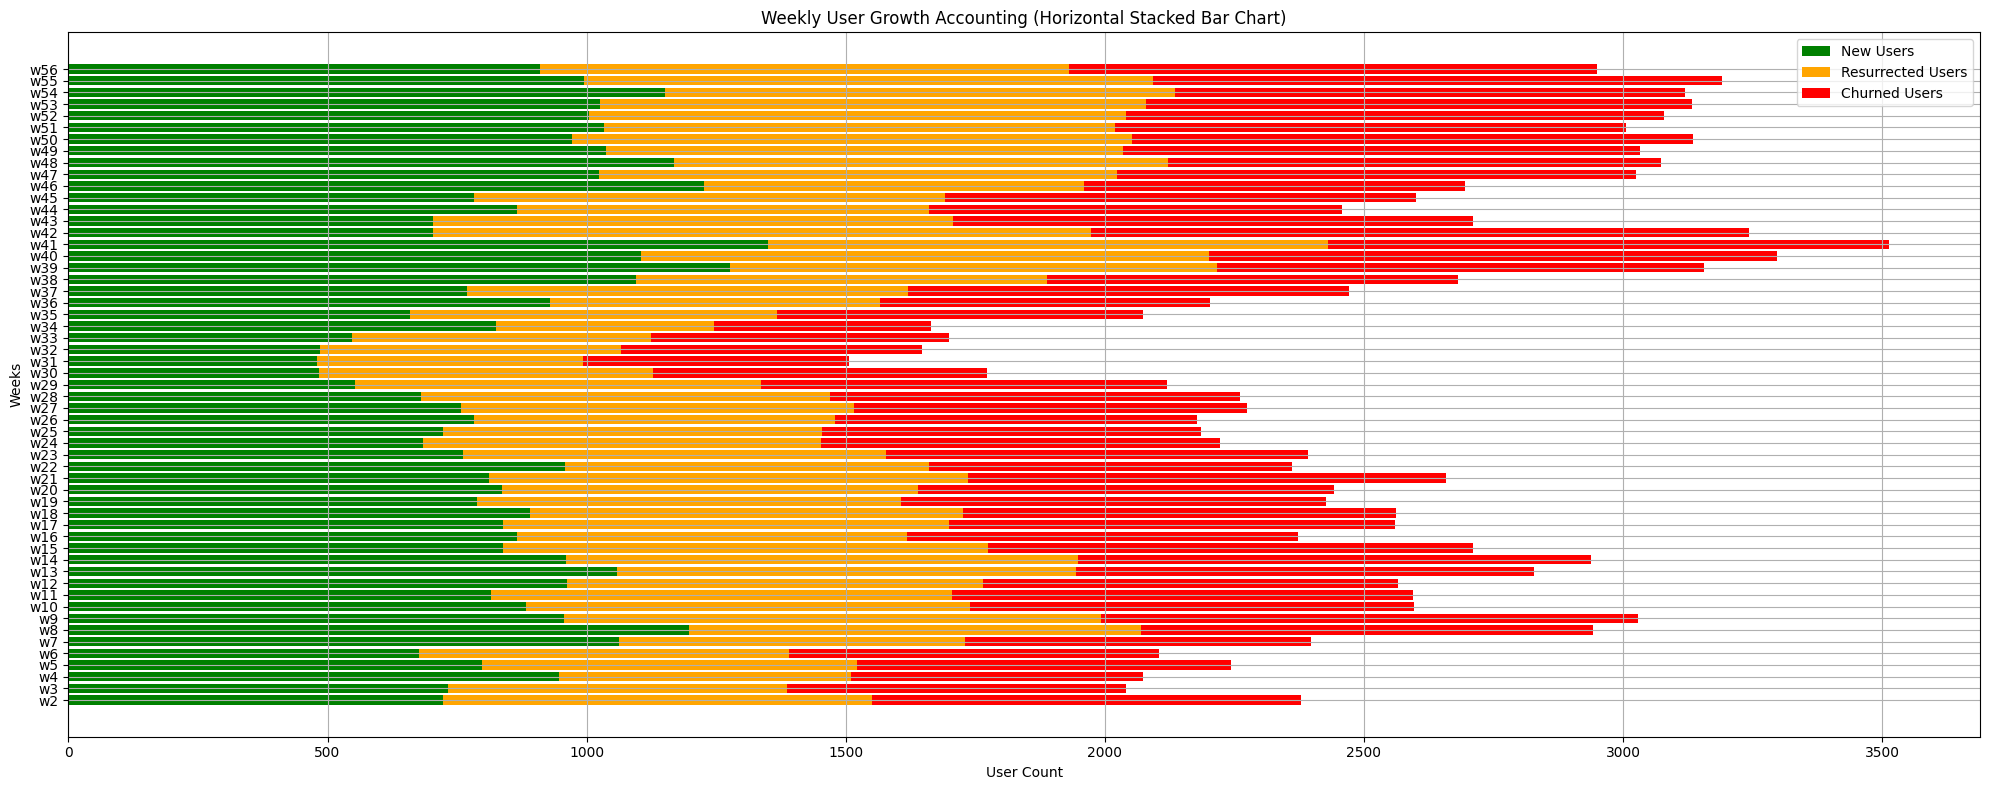

In [11]:
plt.figure(figsize=(20,8))

# Horizontal stacked bar chart
plt.barh(weeks, new_users, label='New Users', color='green')
plt.barh(weeks, resurrected_users, left=new_users, label='Resurrected Users', color='orange')
plt.barh(weeks, churned_users, left=[i+j for i,j in zip(new_users, resurrected_users)], label='Churned Users', color='red')

plt.title("Weekly User Growth Accounting (Horizontal Stacked Bar Chart)")
plt.xlabel("User Count")
plt.ylabel("Weeks")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##### i had worked on analyzing weekly user data to understand the growth and health of a business by calculating key metrics like new users, resurrected users, and churned users. Using an Excel dataset containing active user data over 56 weeks

##### When i import th data i got some unexcepted so i remove that columns then i perform analysis create these charts 

Data Cleaning: You removed unnecessary columns (like unnamed columns) from the dataset to focus on the relevant data for analysis.

Calculation of Key Metrics: You computed the number of:

New Users (users who joined in the current week),
Resurrected Users (inactive users who returned),
Churned Users (users who stopped using the product).
Data Visualization: You created a stacked bar chart to visualize the user growth accounting over 56 weeks, showing the trends in new, resurrected, and churned users.

Insights Generation: Based on the growth accounting metrics, you formulated insights into the user growth and business health, focusing on:

***Tools : Python and chatgpt***